In [1]:
from __future__ import absolute_import                                                                                                                                                    
from __future__ import division                                                                                                                                                           
from __future__ import print_function                                                                                                                                                     
                                                                                                                                                                                          
import tensorflow as tf                                                                                                                                                                   
import tensorflow.contrib.slim as slim                                                                                                                                                    
                                                                                                                                                                                          
import image_processing as ip                                                                                                                                                             
import model                                                                                                                                                                              
import util                                                                                                                                                                               
import sys                                                                                                                                                                                
import glob                                                                                                                                                                               
from skimage import io, color                                                                                                                                                             
import dlib                                                                                                                                                                               
import numpy as np                                                                                                                                                                        
from scipy import ndimage, misc

import matplotlib.pyplot as plt
POINTS = [20, 23, 26, 29, 33, 37, 41, 44, 47, 17, 54, 60, 66]
detector = dlib.get_frontal_face_detector()                                                                                                                                               
predictor = dlib.shape_predictor("./data/shape_predictor_68_face_landmarks.dat")                                                                                                          
                                                                                                                                                                                          
                                                                                                                                                                                          
base_shape_result=None                                                                                                                                                                    
def base_shape():                                                                                                                                                                         
    global base_shape_result                                                                                                                                                              
    if base_shape_result is not None: return base_shape_result                                                                                                                            
    img = io.imread("./data/base_face.jpg")                                                                                                                                               
    dets = detector(img, 1)                                                                                                                                                               
    for k, d in enumerate(dets):                                                                                                                                                          
        shape = predictor(img, d).parts()                                                                                                                                                 
        base_shape_result = np.moveaxis(np.array([[point.x for point in shape], [point.y for point in shape]], dtype=float), 1, 0)                                                        
        return base_shape_result
    
with open('labels') as f:
    labels = f.readlines()

labels = map(lambda e: e.rstrip(), labels)
   

In [2]:
# create model
image = tf.placeholder(tf.float32, shape=[230, 230, 3])
points = tf.placeholder(tf.int32, shape=[13, 2])

images = ip.extract_feature_points(image, points, False)
images = tf.expand_dims(images, 0)
images = images / 255.0

predictions = model.model(images, batch_size=1, train=False)
predictions = tf.nn.softmax(predictions)
top1 = tf.nn.top_k(predictions, k=5)
saver = tf.train.Saver()


Tensor("crop_image/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_1/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_2/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_3/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_4/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_5/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_6/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_7/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_8/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_9/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_10/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_11/Pad:0", shape=(289, 289, 3), dtype=float32)
Tensor("crop_image_12/Pad:0", shape=(289, 289, 3), dtype=float32)


In [3]:
sess = tf.InteractiveSession()

print(tf.train.latest_checkpoint('./summary'))
saver.restore(sess, tf.train.latest_checkpoint('./summary'))

./summary/model.ckpt-50000


/usr/local/lib/python2.7/dist-packages/scipy/ndimage/interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


TopKV2(values=array([[  1.00000000e+00,   2.59031683e-34,   2.59031683e-34,
          2.59031683e-34,   2.59031683e-34]], dtype=float32), indices=array([[533,   0,   1,   2,   3]], dtype=int32))
cyber_image/kuzumaki/PIC2017-02-23-14-35-56-650.jpeg: kuzumaki (prob: 1.000000)


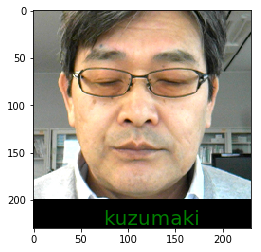

TopKV2(values=array([[  1.00000000e+00,   2.82203500e-34,   2.82203500e-34,
          2.82203500e-34,   2.82203500e-34]], dtype=float32), indices=array([[533,   0,   1,   2,   3]], dtype=int32))
cyber_image/kuzumaki/PIC2017-02-23-14-36-00-683.jpeg: kuzumaki (prob: 1.000000)


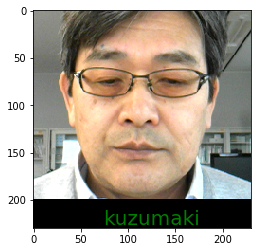

TopKV2(values=array([[  1.00000000e+00,   9.22940675e-34,   9.22940675e-34,
          9.22940675e-34,   9.22940675e-34]], dtype=float32), indices=array([[533,   0,   1,   2,   3]], dtype=int32))
cyber_image/kuzumaki/PIC2017-02-23-14-35-52-633.jpeg: kuzumaki (prob: 1.000000)


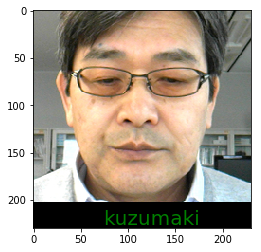

TopKV2(values=array([[  1.00000000e+00,   8.33431378e-36,   8.33431378e-36,
          8.33431378e-36,   8.33431378e-36]], dtype=float32), indices=array([[533,   0,   1,   2,   3]], dtype=int32))
cyber_image/kuzumaki/PIC2017-02-23-14-35-54-635.jpeg: kuzumaki (prob: 1.000000)


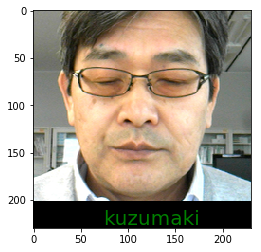

TopKV2(values=array([[  1.00000000e+00,   3.33195372e-32,   2.07959601e-38,
          2.07959601e-38,   2.07959601e-38]], dtype=float32), indices=array([[533, 532,   0,   1,   2]], dtype=int32))
cyber_image/kuzumaki/PIC2017-02-23-14-35-58-655.jpeg: kuzumaki (prob: 1.000000)


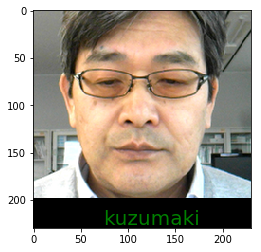

TopKV2(values=array([[  1.00000000e+00,   1.58022231e-22,   1.10043201e-23,
          1.03697068e-24,   1.03939580e-29]], dtype=float32), indices=array([[537, 541, 531, 169,   0]], dtype=int32))
cyber_image/sato/PIC2017-02-23-14-47-57-066.jpeg: sato (prob: 1.000000)


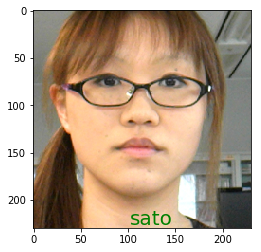

TopKV2(values=array([[  1.00000000e+00,   8.81504099e-24,   1.91347159e-28,
          1.30965162e-28,   2.65404572e-31]], dtype=float32), indices=array([[537, 531, 541, 169,   0]], dtype=int32))
cyber_image/sato/PIC2017-02-23-14-48-01-117.jpeg: sato (prob: 1.000000)


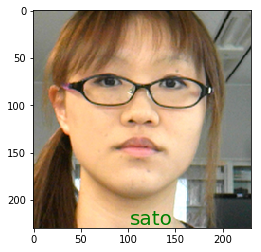

TopKV2(values=array([[  1.00000000e+00,   2.33845058e-20,   1.01702693e-23,
          2.92056201e-25,   2.88583847e-28]], dtype=float32), indices=array([[537, 541, 531, 169, 408]], dtype=int32))
cyber_image/sato/PIC2017-02-23-14-47-59-114.jpeg: sato (prob: 1.000000)


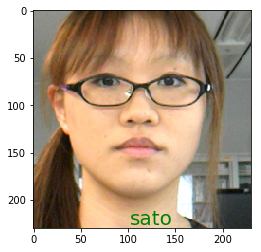

TopKV2(values=array([[  1.00000000e+00,   5.72060748e-24,   3.79512008e-25,
          6.81520500e-28,   2.23017845e-31]], dtype=float32), indices=array([[537, 541, 531, 169,   0]], dtype=int32))
cyber_image/sato/PIC2017-02-23-14-48-05-160.jpeg: sato (prob: 1.000000)


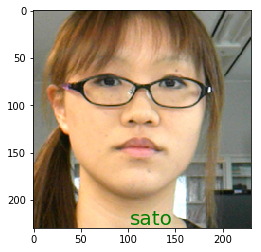

TopKV2(values=array([[  1.00000000e+00,   5.72213510e-24,   5.71928682e-28,
          1.01991099e-28,   1.13458451e-30]], dtype=float32), indices=array([[537, 531, 169, 541,   0]], dtype=int32))
cyber_image/sato/PIC2017-02-23-14-48-03-131.jpeg: sato (prob: 1.000000)


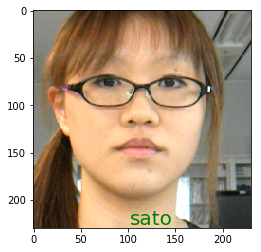

TopKV2(values=array([[  1.00000000e+00,   8.01008359e-20,   2.37436088e-20,
          1.41881282e-20,   1.41881282e-20]], dtype=float32), indices=array([[539, 328,  30,   0,   1]], dtype=int32))
cyber_image/sokuou/PIC2017-02-23-14-42-44-047.jpeg: sokuou (prob: 1.000000)


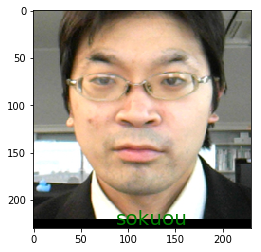

TopKV2(values=array([[  1.00000000e+00,   1.23132886e-18,   2.52000139e-22,
          2.52000139e-22,   2.52000139e-22]], dtype=float32), indices=array([[539, 194,   0,   1,   2]], dtype=int32))
cyber_image/sokuou/PIC2017-02-23-14-42-40-000.jpeg: sokuou (prob: 1.000000)


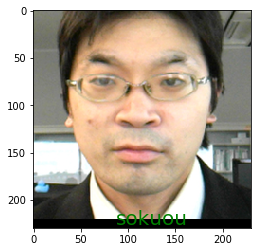

TopKV2(values=array([[  1.00000000e+00,   1.54333032e-19,   1.75628821e-21,
          1.75628821e-21,   1.75628821e-21]], dtype=float32), indices=array([[539, 194,   0,   1,   2]], dtype=int32))
cyber_image/sokuou/PIC2017-02-23-14-42-46-052.jpeg: sokuou (prob: 1.000000)


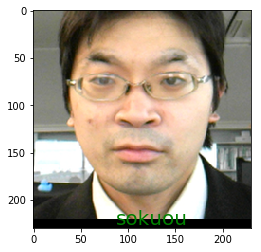

TopKV2(values=array([[  1.00000000e+00,   3.94310334e-21,   2.73670000e-21,
          2.73670000e-21,   2.73670000e-21]], dtype=float32), indices=array([[539, 194,   0,   1,   2]], dtype=int32))
cyber_image/sokuou/PIC2017-02-23-14-42-42-015.jpeg: sokuou (prob: 1.000000)


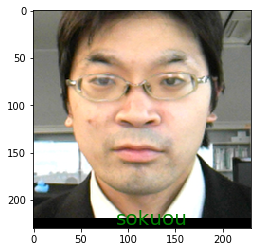

TopKV2(values=array([[  1.00000000e+00,   2.34428055e-22,   2.34428055e-22,
          2.34428055e-22,   2.34428055e-22]], dtype=float32), indices=array([[539,   0,   1,   2,   3]], dtype=int32))
cyber_image/sokuou/PIC2017-02-23-14-42-48-076.jpeg: sokuou (prob: 1.000000)


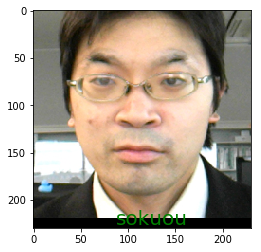

TopKV2(values=array([[  1.00000000e+00,   4.64931797e-22,   4.64931797e-22,
          4.64931797e-22,   4.64931797e-22]], dtype=float32), indices=array([[534,   0,   1,   2,   3]], dtype=int32))
cyber_image/nakazaki/PIC2017-02-23-14-38-28-753.jpeg: nakazaki (prob: 1.000000)


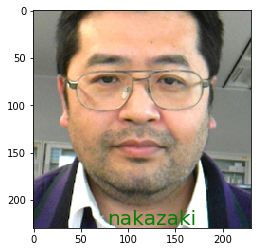

TopKV2(values=array([[  1.00000000e+00,   5.99733771e-25,   5.99733771e-25,
          5.99733771e-25,   5.99733771e-25]], dtype=float32), indices=array([[534,   0,   1,   2,   3]], dtype=int32))
cyber_image/nakazaki/PIC2017-02-23-14-38-22-724.jpeg: nakazaki (prob: 1.000000)


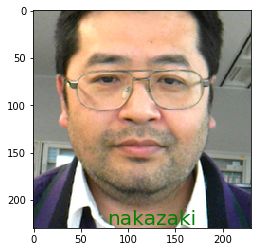

TopKV2(values=array([[  1.00000000e+00,   3.23020175e-26,   3.23020175e-26,
          3.23020175e-26,   3.23020175e-26]], dtype=float32), indices=array([[534,   0,   1,   2,   3]], dtype=int32))
cyber_image/nakazaki/PIC2017-02-23-14-38-30-767.jpeg: nakazaki (prob: 1.000000)


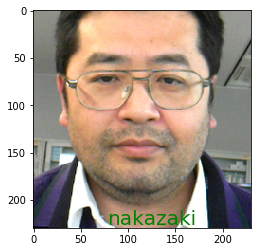

TopKV2(values=array([[  1.00000000e+00,   1.47519526e-22,   1.47519526e-22,
          1.47519526e-22,   1.47519526e-22]], dtype=float32), indices=array([[534,   0,   1,   2,   3]], dtype=int32))
cyber_image/nakazaki/PIC2017-02-23-14-38-26-751.jpeg: nakazaki (prob: 1.000000)


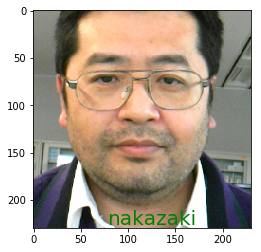

TopKV2(values=array([[  1.00000000e+00,   1.69300536e-21,   1.69300536e-21,
          1.69300536e-21,   1.69300536e-21]], dtype=float32), indices=array([[534,   0,   1,   2,   3]], dtype=int32))
cyber_image/nakazaki/PIC2017-02-23-14-38-24-737.jpeg: nakazaki (prob: 1.000000)


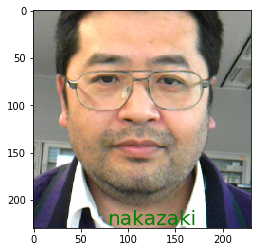

TopKV2(values=array([[  1.00000000e+00,   8.21958994e-25,   8.21958994e-25,
          8.21958994e-25,   8.21958994e-25]], dtype=float32), indices=array([[541,   0,   1,   2,   3]], dtype=int32))
cyber_image/takahashi/PIC2017-02-23-14-45-45-734.jpeg: takahashi (prob: 1.000000)


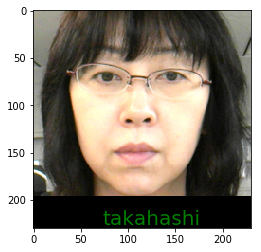

TopKV2(values=array([[  1.00000000e+00,   9.21597680e-32,   9.21597680e-32,
          9.21597680e-32,   9.21597680e-32]], dtype=float32), indices=array([[541,   0,   1,   2,   3]], dtype=int32))
cyber_image/takahashi/PIC2017-02-23-14-45-47-751.jpeg: takahashi (prob: 1.000000)


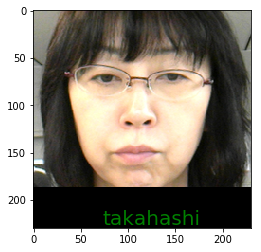

TopKV2(values=array([[  1.00000000e+00,   3.60221832e-33,   3.60221832e-33,
          3.60221832e-33,   3.60221832e-33]], dtype=float32), indices=array([[541,   0,   1,   2,   3]], dtype=int32))
cyber_image/takahashi/PIC2017-02-23-14-45-53-799.jpeg: takahashi (prob: 1.000000)


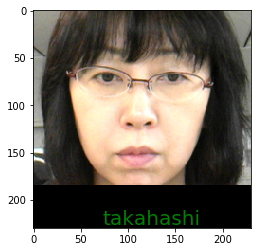

TopKV2(values=array([[  1.00000000e+00,   9.12610662e-16,   9.12610662e-16,
          9.12610662e-16,   9.12610662e-16]], dtype=float32), indices=array([[541,   0,   1,   2,   3]], dtype=int32))
cyber_image/takahashi/PIC2017-02-23-14-45-49-764.jpeg: takahashi (prob: 1.000000)


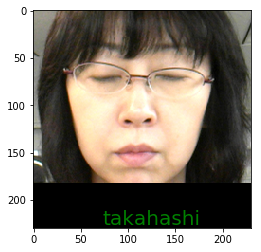

TopKV2(values=array([[  1.00000000e+00,   2.14238222e-35,   2.14238222e-35,
          2.14238222e-35,   2.14238222e-35]], dtype=float32), indices=array([[541,   0,   1,   2,   3]], dtype=int32))
cyber_image/takahashi/PIC2017-02-23-14-45-51-791.jpeg: takahashi (prob: 1.000000)


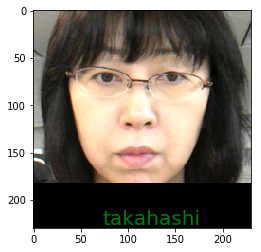

TopKV2(values=array([[  1.00000000e+00,   3.02861882e-26,   8.62016199e-27,
          3.41280570e-31,   1.48855753e-31]], dtype=float32), indices=array([[538, 535, 213, 530, 317]], dtype=int32))
cyber_image/satoshi/PIC2017-02-23-14-51-04-671.jpeg: satoshi (prob: 1.000000)


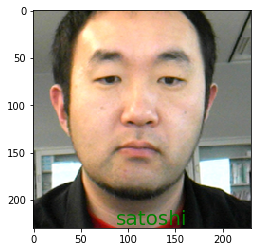

TopKV2(values=array([[  1.00000000e+00,   1.68146333e-23,   1.23865086e-24,
          2.00637890e-29,   2.00637890e-29]], dtype=float32), indices=array([[538, 535, 213,   0,   1]], dtype=int32))
cyber_image/satoshi/PIC2017-02-23-14-51-10-712.jpeg: satoshi (prob: 1.000000)


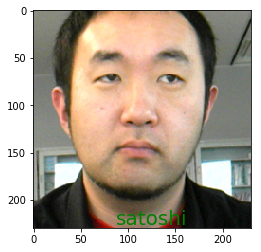

TopKV2(values=array([[  1.00000000e+00,   2.67890752e-22,   1.39972103e-23,
          4.92162430e-24,   6.66363518e-27]], dtype=float32), indices=array([[538, 535, 213, 530,   0]], dtype=int32))
cyber_image/satoshi/PIC2017-02-23-14-51-06-697.jpeg: satoshi (prob: 1.000000)


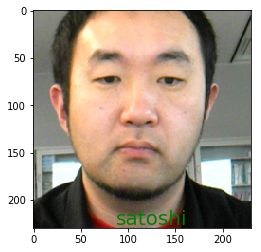

TopKV2(values=array([[  1.00000000e+00,   1.72507097e-24,   8.01772802e-27,
          7.71318016e-30,   1.45356974e-32]], dtype=float32), indices=array([[538, 535, 213, 530,   0]], dtype=int32))
cyber_image/satoshi/PIC2017-02-23-14-51-08-709.jpeg: satoshi (prob: 1.000000)


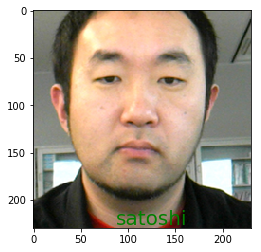

TopKV2(values=array([[  1.00000000e+00,   6.46709642e-20,   7.47581139e-23,
          9.66899305e-31,   9.66899305e-31]], dtype=float32), indices=array([[538, 535, 213,   0,   1]], dtype=int32))
cyber_image/satoshi/PIC2017-02-23-14-51-12-718.jpeg: satoshi (prob: 1.000000)


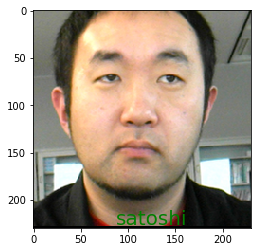

TopKV2(values=array([[  1.00000000e+00,   1.09265330e-09,   1.82660392e-16,
          2.77828626e-17,   2.77828626e-17]], dtype=float32), indices=array([[531, 541, 537,   0,   1]], dtype=int32))
cyber_image/koseki/PIC2017-02-23-14-41-22-656.jpeg: koseki (prob: 1.000000)


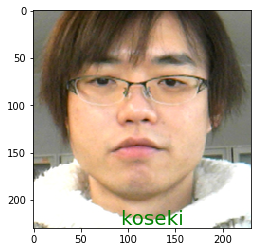

TopKV2(values=array([[  1.00000000e+00,   1.02596230e-15,   2.02708682e-16,
          2.02708682e-16,   2.02708682e-16]], dtype=float32), indices=array([[531, 541,   0,   1,   2]], dtype=int32))
cyber_image/koseki/PIC2017-02-23-14-41-16-591.jpeg: koseki (prob: 1.000000)


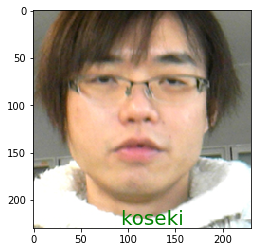

TopKV2(values=array([[  1.00000000e+00,   4.89316920e-13,   1.09900174e-15,
          5.96756099e-16,   1.19425677e-16]], dtype=float32), indices=array([[531, 541, 533, 537,   0]], dtype=int32))
cyber_image/koseki/PIC2017-02-23-14-41-20-628.jpeg: koseki (prob: 1.000000)


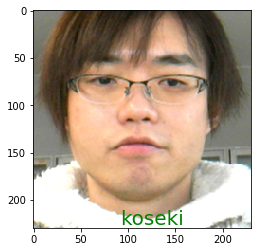

TopKV2(values=array([[  1.00000000e+00,   3.62133351e-15,   8.51135505e-19,
          8.51135505e-19,   8.51135505e-19]], dtype=float32), indices=array([[531, 537,   0,   1,   2]], dtype=int32))
cyber_image/koseki/PIC2017-02-23-14-41-14-545.jpeg: koseki (prob: 1.000000)


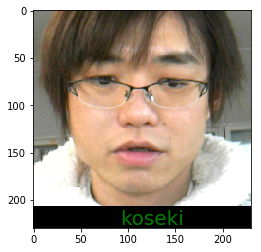

TopKV2(values=array([[  1.00000000e+00,   2.68573509e-20,   8.72476183e-21,
          8.72476183e-21,   8.72476183e-21]], dtype=float32), indices=array([[531, 537,   0,   1,   2]], dtype=int32))
cyber_image/koseki/PIC2017-02-23-14-41-18-613.jpeg: koseki (prob: 1.000000)


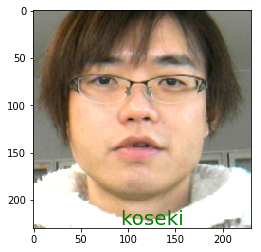

TopKV2(values=array([[  1.00000000e+00,   3.09027581e-10,   5.09872330e-15,
          4.45730343e-17,   4.45730343e-17]], dtype=float32), indices=array([[535, 317, 530,   0,   1]], dtype=int32))
cyber_image/nishimura/PIC2017-02-23-14-29-09-589.jpeg: nishimura (prob: 1.000000)


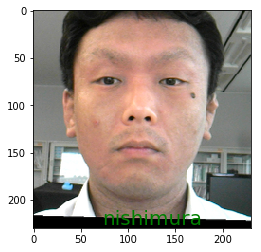

TopKV2(values=array([[  1.00000000e+00,   1.95825248e-11,   3.16801810e-16,
          3.31347171e-18,   3.31347171e-18]], dtype=float32), indices=array([[535, 317, 530,   0,   1]], dtype=int32))
cyber_image/nishimura/PIC2017-02-23-14-29-11-596.jpeg: nishimura (prob: 1.000000)


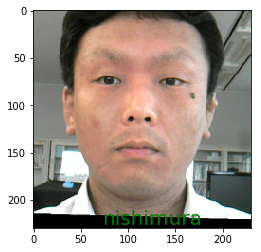

TopKV2(values=array([[  1.00000000e+00,   5.00141703e-13,   7.79993424e-15,
          1.76302852e-20,   1.76302852e-20]], dtype=float32), indices=array([[535, 317, 530,   0,   1]], dtype=int32))
cyber_image/nishimura/PIC2017-02-23-14-29-15-625.jpeg: nishimura (prob: 1.000000)


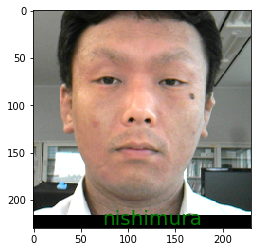

TopKV2(values=array([[  1.00000000e+00,   1.25422546e-12,   2.91540899e-17,
          1.07332475e-18,   1.07332475e-18]], dtype=float32), indices=array([[535, 317, 530,   0,   1]], dtype=int32))
cyber_image/nishimura/PIC2017-02-23-14-29-13-610.jpeg: nishimura (prob: 1.000000)


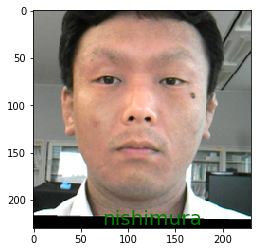

TopKV2(values=array([[  1.00000000e+00,   1.72466615e-13,   3.43735605e-16,
          1.64029205e-20,   2.44529513e-21]], dtype=float32), indices=array([[535, 317, 530, 538,   0]], dtype=int32))
cyber_image/nishimura/PIC2017-02-23-14-29-17-642.jpeg: nishimura (prob: 1.000000)


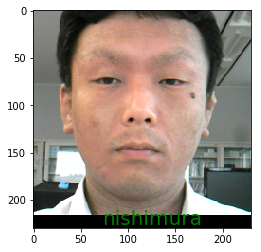

TopKV2(values=array([[  1.00000000e+00,   1.12273043e-17,   2.88134020e-20,
          6.44931705e-25,   2.27455223e-26]], dtype=float32), indices=array([[540, 531, 533, 534,   0]], dtype=int32))
cyber_image/tachibana/PIC2017-02-23-14-44-17-754.jpeg: tachibana (prob: 1.000000)


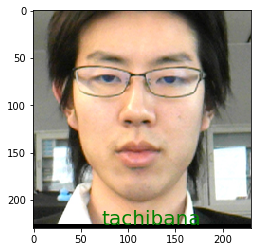

TopKV2(values=array([[  1.00000000e+00,   1.43177909e-14,   3.99668774e-18,
          3.99668774e-18,   3.99668774e-18]], dtype=float32), indices=array([[540, 531,   0,   1,   2]], dtype=int32))
cyber_image/tachibana/PIC2017-02-23-14-44-23-816.jpeg: tachibana (prob: 1.000000)


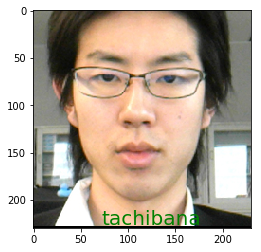

TopKV2(values=array([[  1.00000000e+00,   7.29596505e-12,   3.34041525e-18,
          3.34041525e-18,   3.34041525e-18]], dtype=float32), indices=array([[540, 531,   0,   1,   2]], dtype=int32))
cyber_image/tachibana/PIC2017-02-23-14-44-19-784.jpeg: tachibana (prob: 1.000000)


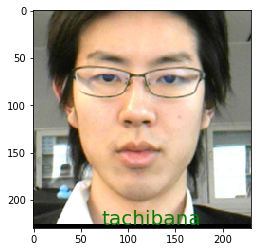

TopKV2(values=array([[  1.00000000e+00,   5.92785007e-18,   1.61168985e-23,
          1.96386417e-25,   1.96386417e-25]], dtype=float32), indices=array([[540, 531, 533,   0,   1]], dtype=int32))
cyber_image/tachibana/PIC2017-02-23-14-44-15-737.jpeg: tachibana (prob: 1.000000)


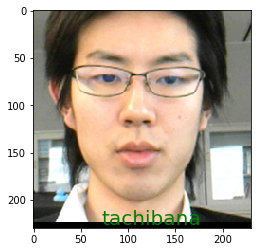

TopKV2(values=array([[  1.00000000e+00,   5.56044506e-17,   2.43343995e-21,
          2.43343995e-21,   2.43343995e-21]], dtype=float32), indices=array([[540, 531,   0,   1,   2]], dtype=int32))
cyber_image/tachibana/PIC2017-02-23-14-44-21-789.jpeg: tachibana (prob: 1.000000)


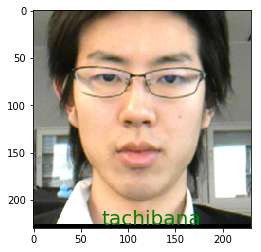

TopKV2(values=array([[  1.00000000e+00,   1.71232736e-22,   3.81351107e-23,
          1.38525612e-24,   1.23864149e-24]], dtype=float32), indices=array([[536, 403, 530, 540,  60]], dtype=int32))
cyber_image/ono/PIC2017-02-23-14-33-40-420.jpeg: ono (prob: 1.000000)


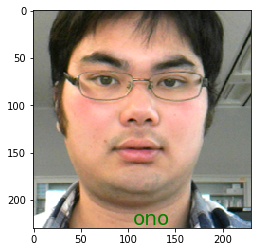

TopKV2(values=array([[  1.00000000e+00,   7.50599521e-21,   3.98429071e-21,
          2.55915969e-21,   1.12912355e-21]], dtype=float32), indices=array([[536, 403,  60, 530,   0]], dtype=int32))
cyber_image/ono/PIC2017-02-23-14-33-42-423.jpeg: ono (prob: 1.000000)


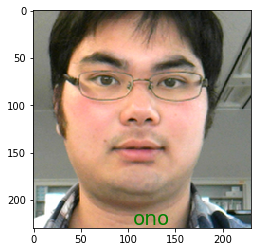

TopKV2(values=array([[  1.00000000e+00,   1.11858775e-25,   3.45168516e-27,
          2.81041038e-27,   1.69446603e-28]], dtype=float32), indices=array([[536, 301, 534, 540, 532]], dtype=int32))
cyber_image/ono/PIC2017-02-23-14-33-46-451.jpeg: ono (prob: 1.000000)


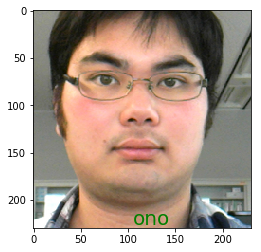

TopKV2(values=array([[  1.00000000e+00,   1.41877883e-22,   5.05676659e-23,
          1.50950964e-23,   2.69138061e-24]], dtype=float32), indices=array([[536, 540, 530,  60, 534]], dtype=int32))
cyber_image/ono/PIC2017-02-23-14-33-38-390.jpeg: ono (prob: 1.000000)


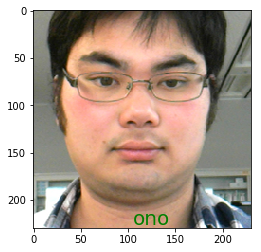

TopKV2(values=array([[  1.00000000e+00,   2.56826073e-24,   1.73647987e-24,
          1.53818361e-24,   5.24773989e-25]], dtype=float32), indices=array([[536, 540,  60, 403, 301]], dtype=int32))
cyber_image/ono/PIC2017-02-23-14-33-44-448.jpeg: ono (prob: 1.000000)


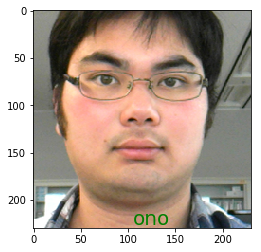

TopKV2(values=array([[  1.00000000e+00,   5.93468132e-26,   5.20778228e-30,
          1.10335309e-31,   1.10335309e-31]], dtype=float32), indices=array([[530, 403, 439,   0,   1]], dtype=int32))
cyber_image/hayashi/PIC2017-02-23-15-01-42-465.jpeg: hayashi (prob: 1.000000)


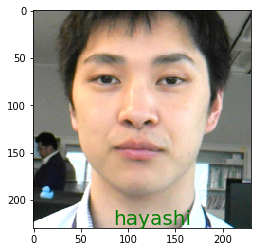

TopKV2(values=array([[  1.00000000e+00,   1.75960820e-28,   2.16257859e-30,
          2.16257859e-30,   2.16257859e-30]], dtype=float32), indices=array([[530, 403,   0,   1,   2]], dtype=int32))
cyber_image/hayashi/PIC2017-02-23-15-01-34-400.jpeg: hayashi (prob: 1.000000)


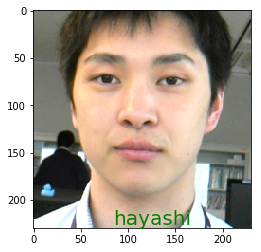

TopKV2(values=array([[  1.00000000e+00,   4.08948698e-17,   1.77003694e-20,
          1.77003694e-20,   1.77003694e-20]], dtype=float32), indices=array([[530, 401,   0,   1,   2]], dtype=int32))
cyber_image/hayashi/PIC2017-02-23-14-39-44-591.jpeg: hayashi (prob: 1.000000)


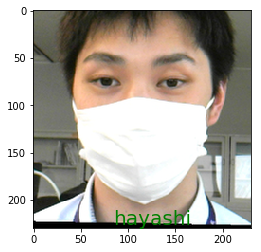

cyber_image/hayashi/PIC2017-02-23-14-39-42-588.jpeg: No face detected
TopKV2(values=array([[  1.00000000e+00,   2.44436233e-21,   1.39689788e-25,
          1.39689788e-25,   1.39689788e-25]], dtype=float32), indices=array([[530, 403,   0,   1,   2]], dtype=int32))
cyber_image/hayashi/PIC2017-02-23-15-01-38-439.jpeg: hayashi (prob: 1.000000)


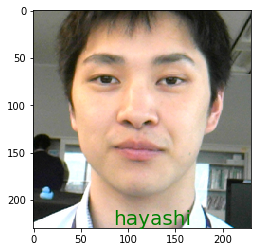

cyber_image/hayashi/PIC2017-02-23-14-39-50-632.jpeg: No face detected
cyber_image/hayashi/PIC2017-02-23-14-39-46-601.jpeg: No face detected
TopKV2(values=array([[  1.00000000e+00,   5.09447574e-26,   3.93390751e-29,
          3.93390751e-29,   3.93390751e-29]], dtype=float32), indices=array([[530, 535,   0,   1,   2]], dtype=int32))
cyber_image/hayashi/PIC2017-02-23-14-39-48-630.jpeg: hayashi (prob: 1.000000)


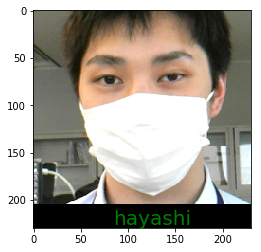

TopKV2(values=array([[  1.00000000e+00,   2.10399508e-25,   1.41371157e-29,
          1.41371157e-29,   1.41371157e-29]], dtype=float32), indices=array([[530, 403,   0,   1,   2]], dtype=int32))
cyber_image/hayashi/PIC2017-02-23-15-01-40-449.jpeg: hayashi (prob: 1.000000)


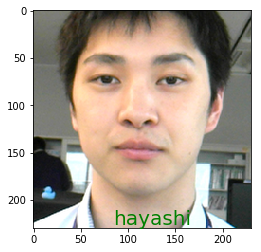

TopKV2(values=array([[  1.00000000e+00,   3.10296406e-24,   1.07441006e-26,
          1.07441006e-26,   1.07441006e-26]], dtype=float32), indices=array([[530, 403,   0,   1,   2]], dtype=int32))
cyber_image/hayashi/PIC2017-02-23-15-01-36-414.jpeg: hayashi (prob: 1.000000)


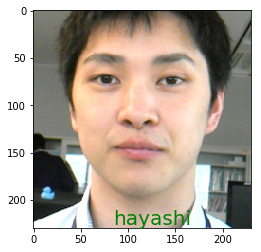

TopKV2(values=array([[  1.00000000e+00,   2.53993841e-16,   1.18711420e-20,
          2.89931879e-23,   2.89931879e-23]], dtype=float32), indices=array([[532, 452, 534,   0,   1]], dtype=int32))
cyber_image/kudo/PIC2017-02-23-14-37-34-410.jpeg: kudo (prob: 1.000000)


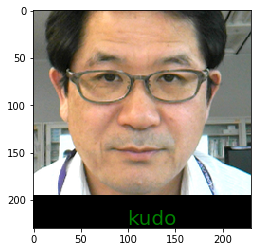

TopKV2(values=array([[  1.00000000e+00,   3.17280924e-11,   8.23163741e-18,
          1.36459420e-20,   7.25959070e-21]], dtype=float32), indices=array([[532, 452, 534, 536, 151]], dtype=int32))
cyber_image/kudo/PIC2017-02-23-14-37-32-406.jpeg: kudo (prob: 1.000000)


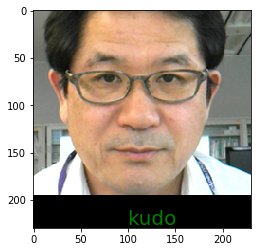

TopKV2(values=array([[  1.00000000e+00,   1.67839165e-18,   2.13416180e-26,
          1.49340643e-27,   1.49340643e-27]], dtype=float32), indices=array([[532, 452, 534,   0,   1]], dtype=int32))
cyber_image/kudo/PIC2017-02-23-14-37-30-379.jpeg: kudo (prob: 1.000000)


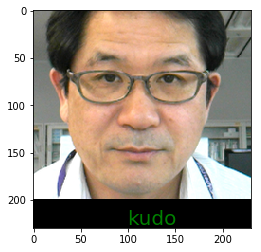

TopKV2(values=array([[  1.00000000e+00,   5.24718207e-24,   1.61161356e-26,
          6.99729638e-27,   6.99729638e-27]], dtype=float32), indices=array([[532, 534, 452,   0,   1]], dtype=int32))
cyber_image/kudo/PIC2017-02-23-14-37-26-349.jpeg: kudo (prob: 1.000000)


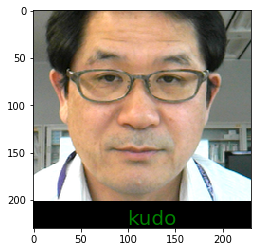

TopKV2(values=array([[  1.00000000e+00,   9.99747760e-17,   2.26849992e-22,
          4.17351792e-25,   4.17351792e-25]], dtype=float32), indices=array([[532, 452, 534,   0,   1]], dtype=int32))
cyber_image/kudo/PIC2017-02-23-14-37-28-374.jpeg: kudo (prob: 1.000000)


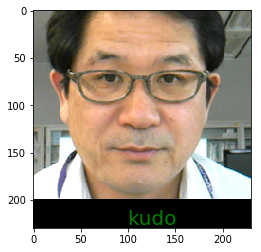

In [4]:
images_extract = ["model/submodel_%d/Conv_2/Elu:0" % i for i in range(13)]

for f in glob.glob("cyber_image/*/*.jpeg"):
    try:
        img = io.imread(f)
    except Exception as e:
        print("image loading error")
        print(e)
        continue

    if img.ndim == 2:
        img = color.gray2rgb(img)

    try:
        dets = detector(img, 1)
    except RuntimeError as e:
        print("skip file %s" % f)
        print(e)
        continue

    if len(dets) is 0:
        print("%s: No face detected" % f)
        continue

    for k, d in enumerate(dets):
        shape = predictor(img, d).parts()
        shape = np.moveaxis(np.array([[point.x for point in shape], [point.y for point in shape]], dtype=float), 1, 0)

        d, z, tform = util.procrustes(base_shape(), shape,
                scaling=True, reflection='best')
        zi = z.astype(int)
        imgt = util.transform(img, tform)
        imgt = imgt[0:230, 0:230, : ]
        imgt = misc.imresize(imgt, (230, 230))
        imgt = np.fliplr(imgt)

        ps=map(lambda e: [230 - zi[e][0], zi[e][1]], POINTS)
        pred, topk, pools = sess.run([predictions, top1, images_extract], feed_dict={image: imgt, points: ps})

        
#         for j in range(13):
#             fig = plt.figure()
#             for i in range(10):
#                 fig.add_subplot(1, 10, i+1)
#                 plt.gray()
#                 plt.tick_params(
#                     axis='both',          # changes apply to the x-axis
#                     which='both',      # both major and minor ticks are affected
#                     bottom='off',      # ticks along the bottom edge are off
#                     top='off',         # ticks along the top edge are off
#                     left='off',      # ticks along the bottom edge are off
#                     right='off',         # ticks along the top edge are off
#                     labelbottom='off', # labels along the bottom edge are off
#                     labelleft='off') # labels along the bottom edge are off
#                 plt.imshow(pools[j][0,:,:,i])
#             plt.show()
        print(topk)
        if topk[0][0][0] < 0.9:
            result="Unknown"
        else:
            result=labels[topk[1][0][0]]
            
        print("%s: %s (prob: %f)" % (f, result, topk[0][0][0]))
        plt.imshow(imgt)
        plt.text(125, 230, result, ha='center', va='bottom', fontsize=20, color='green')

        plt.show()
